# Data Processing

### Graphs:
- 1. Mass vs time
- 2. 
- 3. 
- 4. 

### subtasks:
- Integrate previous name consolidations

## Imports

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load data file into pandas dataframe

In [29]:
# path to 3d-printing data CSV file
csv_file = 'data/3d_curr.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# convert timestamp column from str to pd.Timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Now we can work with the 'df' DataFrame to analyze or manipulate the data as needed
print(df.head())  # Print the first few rows of the DataFrame

            timestamp          name   print_time print_mass_grams  \
0 2021-11-29 19:37:03    karen hinh         8h30               90   
1 2021-11-29 19:37:24    karen hinh           4h               40   
2 2021-11-29 21:37:33     Chr Allum   8ish hours    too damn much   
3 2021-11-29 22:32:55    Sam Kaplan      2 hr 54              36g   
4 2021-11-29 22:33:49  Avery Clowes  8hrs 30 min              53g   

        reason_print class printer  
0  Project Team/Club   NaN     NaN  
1      Class Project   PIE     NaN  
2      Class Project   DFM     NaN  
3   Personal Project   NaN     NaN  
4      Class Project   PIE     NaN  


## print mass vs time

/var/folders/fs/7xnvl2f16v918p54xgw1kxjm0000gn/T/ipykernel_14397/393377623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_print_mass["print_mass_grams"] = df_print_mass["print_mass_grams"].str.replace(r'\D', '', regex=True).replace('', np.nan)
Fontconfig warning: ignoring UTF-8: not a valid region tag


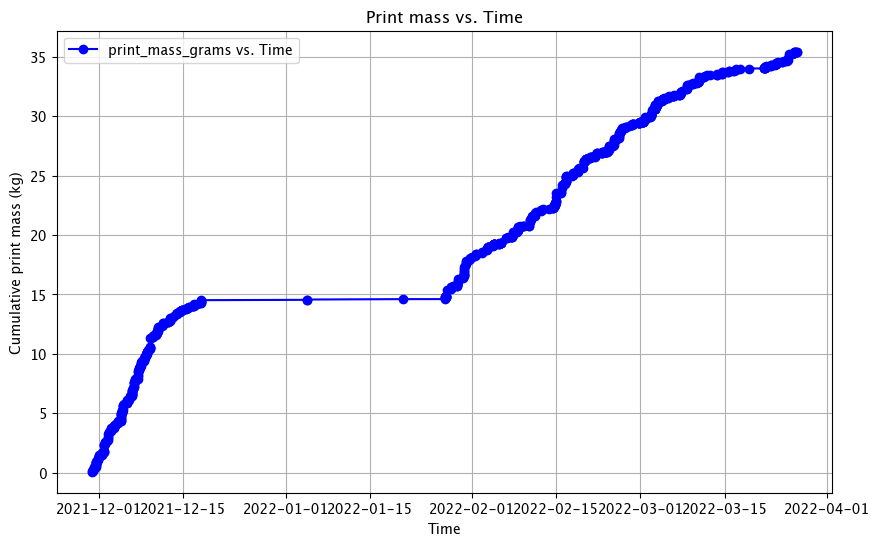

In [75]:
# create new dataframe with copies of timestamp and print_mass_grams columns
df_print_mass = df[["timestamp", "print_mass_grams"]]

# clean all non-numeric characters from print_mass col and replace empty strings with nan
df_print_mass["print_mass_grams"] = df_print_mass["print_mass_grams"].str.replace(r'\D', '', regex=True).replace('', np.nan)
df_print_mass = df_print_mass[df_print_mass["print_mass_grams"].notnull()] # remove any colums with nan print mass
df_print_mass["print_mass_grams"] = df_print_mass["print_mass_grams"].astype(float)

# add column for cumulative sum of print masses
df_print_mass["print_mass_cum"] = df_print_mass["print_mass_grams"].cumsum()

# Create a line plot using Matplotlib
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(df_print_mass['timestamp'], df_print_mass["print_mass_cum"].div(1000), marker='o', linestyle='-', color='b', label='print_mass_grams vs. Time')
plt.title("Print mass vs. Time")
plt.xlabel('Time')
plt.ylabel("Cumulative print mass (kg)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### uuuhhhHHH

In [11]:
unique_names_dirty = df["class"].unique()
print(unique_names_dirty, len(unique_names_dirty))

[nan 'PIE' 'DFM' 'dfm' 'pie' 'Design for Manufacturing' 'scope'
 'PIEEEEEEEE' 'My independent study' 'DesNat' 'Pie'
 'PIE, Renewable Energy' 'Desnat' 'Iterate' 'Renewable' 'desnat'
 'Renewable Energy' 'independent study' 'Des Nat' 'desNat' 'SCOPE'
 'dednat' 'ddesnat' 'Design Nature' 'desnT' 'EEC' 'mech proto' 'Rocketry'
 'Robosys' 'RoboSys' 'Robosy' 'ISR/ENGR 0077' 'MechProto' 'DBF' 'Formula'
 'formula' 'Research' 'Baja' 'LAIR research' 'EEC Capstone' 'Mech Proto'
 'mechproto' 'Mech proto' 'mech Proto' 'Mach Proto'
 'Sustainable Design Lab' 'LAIR' 'QEA2' 'Robotic System Integration'
 'STeP' 'qea2' 'rocketry' 'large 3dprinter' 'P&M' 'QEA 2'
 'Robotic Systems Integration' 'SCOPE MBARI' 'large 3d printer' 'p &M'
 'P&m' 'larger printer' 'large printer' 'large rinter' 'Mech Proto Lab'
 'Mechproto' 'Ade' 'Products and Markets' 'Products and markets' 'pint'
 'mech proto clock project' 'Passionate pursuit/backwards bike'
 'Passionate Pursuit/Backwards bike' 'Passionate Pursuit/backwards bike'
